In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

HOUSES_PRICES_TRAIN = 'train.csv'

tb= pd.read_csv(HOUSES_PRICES_TRAIN)

print(tb)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
#exploracion inicial
print("exploracion inicial ")
print(tb.info())

print(tb.describe())

df_selected = tb[['MSSubClass', 'LotArea','Street','LotShape','GarageCars','PoolArea','SaleCondition','YrSold','SalePrice']]

print(df_selected.head())

In [82]:
#valoracio de valores faltantess
valores_Faltantes = tb.isnull().sum()
print(valores_Faltantes[valores_Faltantes > 0])

Series([], dtype: int64)


In [81]:
#imputacion

# el caso de los numericos conviene trabajar por media  para no afectar  analisis
tb['LotFrontage'].fillna(tb['LotFrontage'].median(), inplace=True)  
tb['PoolArea'].fillna(0, inplace=True) 
tb['MasVnrArea'].fillna(tb['MasVnrArea'].median(), inplace=True) 

# Imputar valores faltantes en columnas categóricas
categorical_cols_na = [
    'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'
]
tb.fillna({
    'Alley': 'NA',
    'PoolQC': 'NA',
    'Fence': 'NA',
    'MiscFeature': 'NA',
    'FireplaceQu': 'NA'
}, inplace=True)

# la imputacion por moda puede ser efectiva en estos campos ya que son colimnas categoricas 
categorical_cols_mode = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
    'SaleType', 'SaleCondition', 'MasVnrType', 'BsmtQual', 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond','GarageYrBlt'
]
for column in categorical_cols_mode:
    tb[column].fillna(tb[column].mode()[0], inplace=True)


# Verificar valores faltantes restantes
valores_Faltantes = tb.isnull().sum()
print(valores_Faltantes[valores_Faltantes > 0])


valores_Faltantes = tb.isnull().sum()
print(valores_Faltantes[valores_Faltantes > 0])

Series([], dtype: int64)
Series([], dtype: int64)


C:\Users\alexa\AppData\Local\Temp\ipykernel_20796\1019403708.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tb['LotFrontage'].fillna(tb['LotFrontage'].median(), inplace=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_20796\1019403708.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


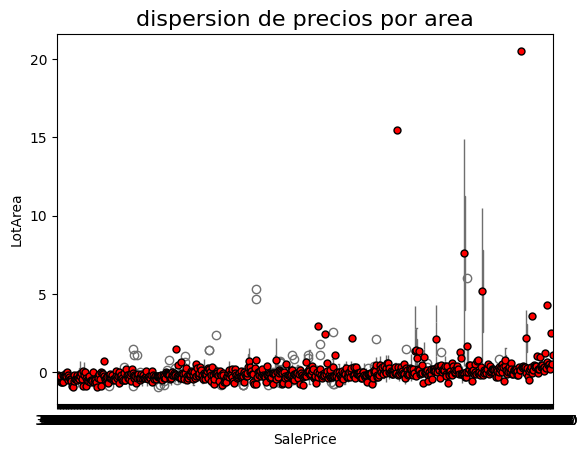

In [83]:
#Detecion de outliners
box = sns.boxplot(
    x=tb["SalePrice"], 
    y=tb["LotArea"],
    color="skyblue", 
    width=0.8, 
    showmeans=True,  
    meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"5"} 
)
plt.yticks(fontsize=10)
plt.title("dispersion de precios por area", fontsize=16)
print(tb["SalePrice"].head())
plt.show()

In [84]:
# Calcular el IQR para 'SalePrice'
Q1 = tb['SalePrice'].quantile(0.25)
Q3 = tb['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = tb[(tb['SalePrice'] < lower_bound) | (tb['SalePrice'] > upper_bound)]
print(f"Number of outliers in 'SalePrice': {outliers.shape[0]}")

# ya con esta identificacion podemo tomar el camino de eliminarlo o de transformatlo
# la mejor opcion considero que debe ser mantener los datos aunque resalten estos pueden mejorar la prediccion del modelo

Number of outliers in 'SalePrice': 61


In [66]:
import numpy as np
tb['SalePrice_log'] = np.log1p(tb['SalePrice'])

tb['SalePrice'] = np.where(tb['SalePrice'] < lower_bound, lower_bound, tb['SalePrice'])
tb['SalePrice'] = np.where(tb['SalePrice'] > upper_bound, upper_bound, tb['SalePrice'])


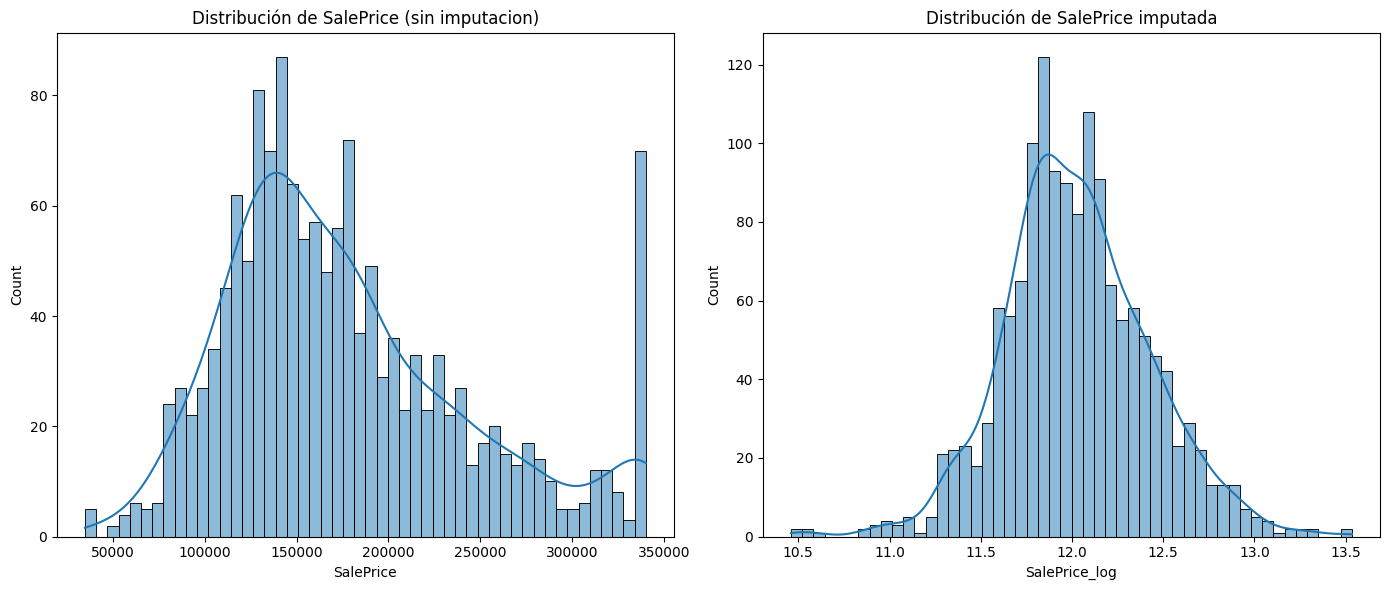

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(tb['SalePrice'], bins=50, kde=True)
plt.title('Distribución de SalePrice (sin imputacion)')
plt.subplot(1, 2, 2)
sns.histplot(tb['SalePrice_log'], bins=50, kde=True)
plt.title('Distribución de SalePrice imputada')

plt.tight_layout()
plt.show()


In [ ]:
#busqueda de col a normalizar 
from sklearn.preprocessing import MinMaxScaler,StandardScaler


Table_To_Normalice = tb[['LotArea','GrLivArea']]

print(Table_To_Normalice)


scaler = MinMaxScaler()

columns_to_normalize = ['LotArea', 'GrLivArea']

tb[columns_to_normalize] = scaler.fit_transform(tb[columns_to_normalize])

print(tb[columns_to_normalize].head())

#la normalizacion es ideal para datos numericos ya que trabajarlos con escala puede mejorar la eficiencia


scaler = StandardScaler()

# seleccionamos estas columnas por relacionarse con el area y no zon datos categoticos
columns_to_standardize = ['LotArea', 'GrLivArea', 'OverallQual']

tb[columns_to_standardize] = scaler.fit_transform(tb[columns_to_standardize])
print(tb[columns_to_standardize].head())


In [79]:
# usamos la col overallqual y overalll cond para calcular la calidad y condicion de una vivienda y usamos grlivArea + Totalbsmtsf para calcular el area de vivienda construida
tb['Quality_Index'] = tb['OverallQual'] * tb['OverallCond']
tb['TotalBuildingArea'] = tb['GrLivArea'] + tb['TotalBsmtSF']


print(tb[['OverallQual', 'OverallCond', 'Quality_Index']].head())
print(tb[['GrLivArea', 'TotalBsmtSF', 'TotalBuildingArea']].head())


   OverallQual  OverallCond  Quality_Index
0     0.651479            5       3.257396
1    -0.071836            8      -0.574689
2     0.651479            5       3.257396
3     0.651479            5       3.257396
4     1.374795            5       6.873973
   GrLivArea  TotalBsmtSF  TotalBuildingArea
0   0.370333          856         856.370333
1  -0.482512         1262        1261.517488
2   0.515013          920         920.515013
3   0.383659          756         756.383659
4   1.299326         1145        1146.299326


In [85]:
# tecnica one encoding
# Variables categóricas a codificar
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Aplicar One-Hot Encoding
tb_encoded = pd.get_dummies(tb, columns=categorical_columns)

print(tb_encoded.head())


   Id  MSSubClass  LotFrontage   LotArea Alley LotConfig LandSlope  \
0   1          60         65.0 -0.207142    NA    Inside       Gtl   
1   2          20         80.0 -0.091886    NA       FR2       Gtl   
2   3          60         68.0  0.073480    NA    Inside       Gtl   
3   4          70         60.0 -0.096897    NA    Corner       Gtl   
4   5          60         84.0  0.375148    NA       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... SaleType_ConLw SaleType_New  \
0      CollgCr       Norm       Norm  ...          False        False   
1      Veenker      Feedr       Norm  ...          False        False   
2      CollgCr       Norm       Norm  ...          False        False   
3      Crawfor       Norm       Norm  ...          False        False   
4      NoRidge       Norm       Norm  ...          False        False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         False         True                  False           

In [86]:
origin= pd.read_csv(HOUSES_PRICES_TRAIN)

print("Antes del preprocesamiento:")
print(origin.describe())
print("Después del preprocesamiento:")
print(tb.describe())

Antes del preprocesamiento:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407  